# Transfer Spend and Wage Bill Analysis or "Big Money = Big Results? An analysis of monetary variables contributing to Premier League success"

### Purpose
Every transfer window (the period in which players may be transferred to and from a team) in the Premier League there are fans who decry their Managers and Owners for not spending enough money to get higher value players, who they believe will contribute to the club's success. While thousands of fans make these claims, has it actually been proven that spending more money in the transfer window contributes to domestic league success? This analysis seeks to answer this question by investigating the relationship between club transfer spend and subsequent club success. I will be working with 3 distinct datasets (pl_table_2014_2024, pl_transfers_2014_2024_cleaned, and pl_wage_bill_2014_2024) for this analysis.

### Datasets
- pl_table_2014_2024: contains data for Premier League team performance by season.
- pl_transfers_2014_2024_cleaned: contains data for all transfers occurring between 2014 to 2024
- pl_wage_bill_2014_2024: contains data for team wage bills from 2014 to 2024

In [ ]:
# Import relevant Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Read datasets into Data Frames

pl_table_df = pd.read_csv('../csvs/pl_table_2014_2024.csv', index_col = False)
pl_transfer_df = pd.read_csv('../csvs/pl_transfers_2014_2024_cleaned.csv', index_col = False)
pl_wage_df = pd.read_csv('../csvs/pl_wage_bill_2014_2024.csv', index_col = False)
pl_table_halves_df = pd.read_csv('../csvs/pl_table_halves_2014_2024.csv')


In [4]:
# Data Frame Features
pl_table_halves_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Team Name   400 non-null    object 
 2   Season      400 non-null    object 
 3   Half        400 non-null    object 
 4   W           400 non-null    int64  
 5   L           400 non-null    int64  
 6   D           400 non-null    int64  
 7   GF          400 non-null    int64  
 8   GF_H        400 non-null    int64  
 9   GF_A        400 non-null    int64  
 10  GA          400 non-null    int64  
 11  GA_H        400 non-null    int64  
 12  GA_A        400 non-null    int64  
 13  GD          400 non-null    int64  
 14  Points      400 non-null    int64  
 15  Place       400 non-null    float64
dtypes: float64(1), int64(12), object(3)
memory usage: 50.1+ KB


In [5]:
pl_transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8011 entries, 0 to 8010
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8011 non-null   int64  
 1   Team            8011 non-null   object 
 2   Season          8011 non-null   object 
 3   Time            8011 non-null   object 
 4   Name            8011 non-null   object 
 5   Status          8011 non-null   object 
 6   Position        8011 non-null   object 
 7   Market Value    8011 non-null   float64
 8   Age             8011 non-null   int64  
 9   Fee             8011 non-null   float64
 10  is_loan         8011 non-null   int64  
 11  is_loan_return  8011 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 751.2+ KB


In [6]:
pl_wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team          200 non-null    object
 1   Player Count  200 non-null    int64 
 2   Weekly Wages  200 non-null    object
 3   Annual Wages  200 non-null    object
 4   Season        200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [7]:
# Let's get the sum for transfer spend by time within season
agg_transfer_spend_in = pl_transfer_df[pl_transfer_df['Status'] == "In"].groupby(['Team', 'Season', 'Time'], as_index = False)['Fee'].sum()
agg_transfer_spend_in.head()

agg_transfer_spend_in[agg_transfer_spend_in['Team'] == "Tottenham Hotspur FC"]

,Team,Season,Time,Fee
325,Tottenham Hotspur FC,2014/2015,SUMMER,41850000.0
326,Tottenham Hotspur FC,2014/2015,WINTER,6630000.0
327,Tottenham Hotspur FC,2015/2016,SUMMER,71000000.0
328,Tottenham Hotspur FC,2016/2017,SUMMER,83500000.0
329,Tottenham Hotspur FC,2017/2018,SUMMER,92600000.0
330,Tottenham Hotspur FC,2017/2018,WINTER,28400000.0
331,Tottenham Hotspur FC,2018/2019,SUMMER,0.0
332,Tottenham Hotspur FC,2019/2020,SUMMER,116000000.0
333,Tottenham Hotspur FC,2019/2020,WINTER,34500000.0
334,Tottenham Hotspur FC,2020/2021,SUMMER,110500000.0


In [ ]:
# Create and populate 'Transfer Spend Summer' field for every record based on Transfer Spend summations for each season in the Summer
pl_table_df['Transfer Spend Summer'] = 0

for team in pl_table_df['Team Name'].unique():
    for season in agg_transfer_spend_in[(agg_transfer_spend_in['Team'] == team)]['Season']:
        pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), 'Transfer Spend Summer'] = agg_transfer_spend_in.loc[(agg_transfer_spend_in['Team'] == team) & (agg_transfer_spend_in['Season'] == season) & (agg_transfer_spend_in['Time'] == "SUMMER"), "Fee"].item()

In [ ]:
# Create and populate 'Transfer Spend Winter' field for every record based on Transfer Spend summations for each season in the Winter
pl_table_df['Transfer Spend Winter'] = 0.0

for team in pl_table_df['Team Name'].unique():
    for season in agg_transfer_spend_in[(agg_transfer_spend_in['Team'] == team)  & (agg_transfer_spend_in['Time'] == "WINTER")]['Season']:
        pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), 'Transfer Spend Winter'] = agg_transfer_spend_in.loc[(agg_transfer_spend_in['Team'] == team) & (agg_transfer_spend_in['Season'] == season) & (agg_transfer_spend_in['Time'] == "WINTER"), "Fee"].item()

In [ ]:
# Create and populate 'Transfer Spend Summer' field for every record based on Transfer Spend summations for each season in the Summer
pl_table_halves_df['Transfer Spend Summer'] = 0

for team in pl_table_halves_df['Team Name'].unique():
    for season in agg_transfer_spend_in[(agg_transfer_spend_in['Team'] == team)]['Season']:
        pl_table_halves_df.loc[(pl_table_halves_df['Team Name'] == team) & (pl_table_halves_df['Season'] == season), 'Transfer Spend Summer'] = agg_transfer_spend_in.loc[(agg_transfer_spend_in['Team'] == team) & (agg_transfer_spend_in['Season'] == season) & (agg_transfer_spend_in['Time'] == "SUMMER"), "Fee"].item()

In [ ]:
# Create and populate 'Transfer Spend Summer' field for every record based on Transfer Spend summations for each season in the Summer
pl_table_halves_df['Transfer Spend Winter'] = 0.0

for team in pl_table_halves_df['Team Name'].unique():
    for season in agg_transfer_spend_in[(agg_transfer_spend_in['Team'] == team) & (agg_transfer_spend_in['Time'] == "WINTER")]['Season']:
        print(agg_transfer_spend_in.loc[(agg_transfer_spend_in['Team'] == team) & (agg_transfer_spend_in['Season'] == season) & (agg_transfer_spend_in['Time'] == "WINTER"), "Fee"].item())
        pl_table_halves_df.loc[(pl_table_halves_df['Team Name'] == team) & (pl_table_halves_df['Season'] == season), 'Transfer Spend Winter'] = agg_transfer_spend_in.loc[(agg_transfer_spend_in['Team'] == team) & (agg_transfer_spend_in['Season'] == season) & (agg_transfer_spend_in['Time'] == "WINTER"), "Fee"].item()

0.0
0.0
0.0
34000000.0
0.0
77000000.0
21300000.0
0.0
2960000.0
0.0
9000000.0
11700000.0
17600000.0
2000000.0
0.0
0.0
0.0
0.0
32000000.0
1900000.0
5800000.0
21200000.0
11400000.0
0.0
30500000.0
27000000.0
0.0
12000000.0
7000000.0
6350000.0
0.0
11500000.0
7800000.0
1690000.0
0.0
24250000.0
15400000.0
22800000.0
68000.0
17250000.0
12500000.0
0.0
99850000.0
2500000.0
8000000.0
2000000.0
1800000.0
54800000.0
0.0
0.0
7000000.0
0.0
84650000.0
0.0
8500000.0
4350000.0
54000000.0
42000000.0
0.0
38700000.0
4200000.0
25150000.0
4500000.0
0.0
101100000.0
49000000.0
0.0
2560000.0
20900000.0
1700000.0
0.0
10000000.0
17500000.0
0.0
4200000.0
0.0
10900000.0
15800000.0
30000000.0
43000000.0
18500000.0
31000000.0
4600000.0
0.0
53800000.0
71800000.0
0.0
0.0
0.0
329500000.0
0.0
15480000.0
0.0
41700000.0
18750000.0
1150000.0
0.0
3500000.0
12180000.0
12000000.0
29100000.0
12840000.0
8800000.0
20200000.0
22800000.0
13800000.0
5200000.0
17000000.0
22000000.0
0.0
0.0
0.0
0.0
63250000.0
0.0
21900000.0
31800000.0

In [12]:
# Adjust dollar amounts to 2014 Euro to account for inflation.
inflation_dict_summer = {
    "2014/2015": 1,
    "2015/2016": 1,
    "2016/2017": 1,
    "2017/2018": 1.02,
    "2018/2019": 1.04,
    "2019/2020": 1.05,
    "2020/2021": 1.06,
    "2021/2022": 1.09,
    "2022/2023": 1.19,
    "2023/2024": 1.27
}

inflation_dict_winter = {
    "2014/2015": 1,
    "2015/2016": 1,
    "2016/2017": 1.02,
    "2017/2018": 1.04,
    "2018/2019": 1.05,
    "2019/2020": 1.06,
    "2020/2021": 1.09,
    "2021/2022": 1.19,
    "2022/2023": 1.27,
    "2023/2024": 1.3
}

divisor_summer = pl_table_df['Season'].map(inflation_dict_summer)
divisor_winter = pl_table_df['Season'].map(inflation_dict_winter)

pl_table_df['Transfer Spend Summer'] = (pl_table_df['Transfer Spend Summer'] / divisor_summer)
pl_table_df['Transfer Spend Winter'] = (pl_table_df['Transfer Spend Winter'] / divisor_winter)

pl_table_halves_df['Transfer Spend Summer'] = (pl_table_halves_df['Transfer Spend Summer'] / divisor_summer)
pl_table_halves_df['Transfer Spend Winter'] = (pl_table_halves_df['Transfer Spend Winter'] / divisor_winter)

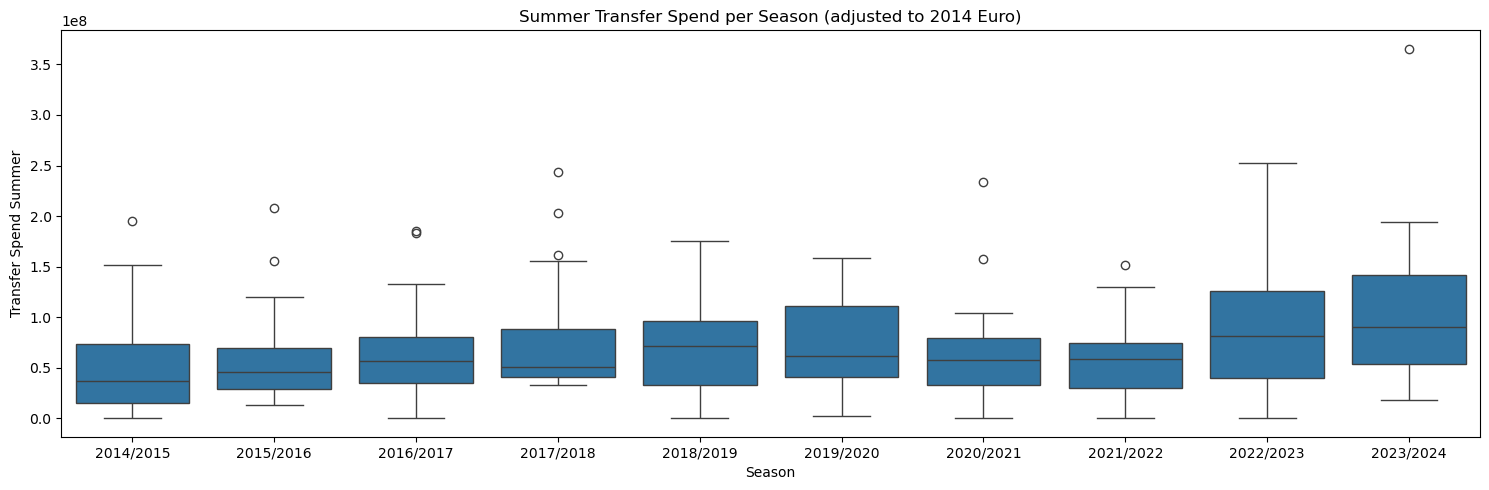

In [13]:
# Summer transfer spend from 2014 to 2024, adjusted to 2014 Euro
# As we can see, overall transfer spend during the summer has been increasing from year-to-year, even adjusted for inflation

plt.figure(figsize = (15, 5))
sns.boxplot(data = pl_table_df, x = 'Season', y = 'Transfer Spend Summer')
plt.title('Summer Transfer Spend per Season (adjusted to 2014 Euro)')
plt.tight_layout()

As we can see from the boxplot above, Summer Transfer Spend has increased consistently season-over-season from 2014 to 2023, even adjusted for inflation, with a slight drop in 2020/2021 and 2021/2022, which was may be accounted for by the COVID pandemic.

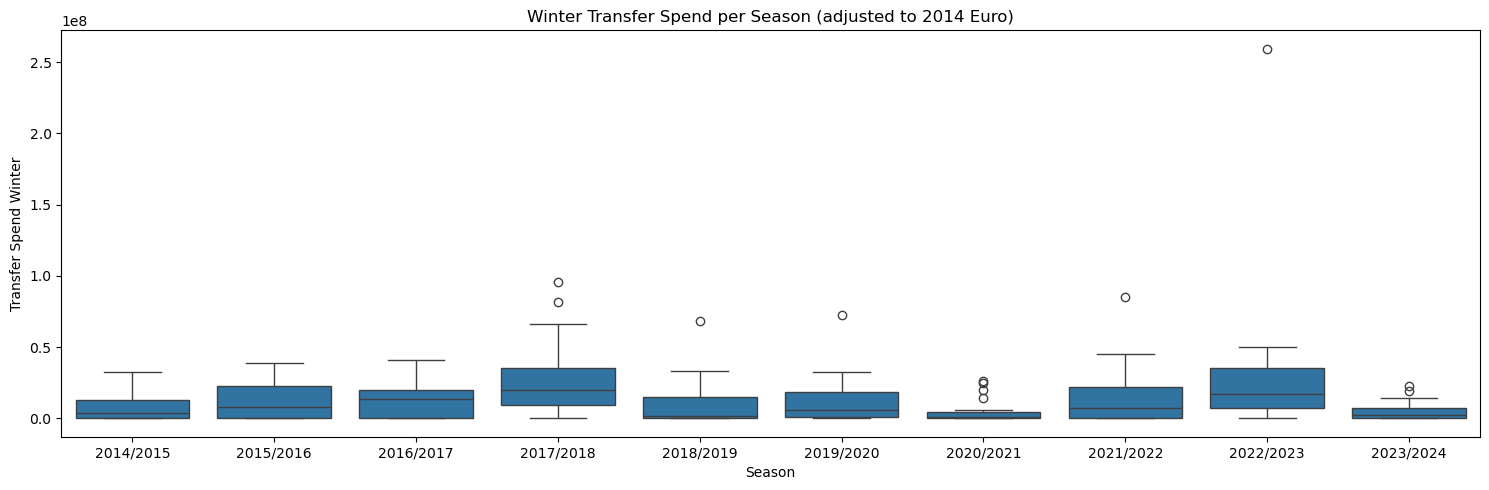

In [14]:
# Winter transfer spend from 2014 to 2024, adjusted to 2014 Euro
# Winter transfer spend tends to fluctuate a bit more 

plt.figure(figsize = (15, 5))
sns.boxplot(data = pl_table_df, x = 'Season', y = 'Transfer Spend Winter')
plt.title('Winter Transfer Spend per Season (adjusted to 2014 Euro)')
plt.tight_layout()

Winter Transfer Spend presents a different trend than Summer Transfer Spend, as Transfer Spend in the Winter appears to ber following a more undulating pattern. This may be attributed to the needs-basis for Winter transfers. Premier League teams will only be spending in the Winter if there is an absolute need for a player of a specific position, as there are many factors that would make mid-season integration into the team difficult for new players. Variation could be attributed to higher injury rates in certain seasons, necessitating more transfers in that season, but further research would need to be conducted to better understand this variation.

In [15]:
# Populate 'Wage Bill' field for each record in pl_table_df with corresponding 'Annual Wages' value in pl_wage_df.

for team in pl_table_df['Team Name'].unique():
    for season in pl_table_df[pl_table_df['Team Name'] == team]['Season']:
        pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), 'Wage Bill'] = pl_wage_df.loc[(pl_wage_df['Team'] == team) & (pl_wage_df['Season'] == season), 'Annual Wages'].item()

pl_table_df['Wage Bill'] = pl_table_df['Wage Bill'].str.replace(",", "").astype(float)

pl_table_df['Wage Bill'] = (pl_table_df['Wage Bill'] / divisor_summer).round(2)

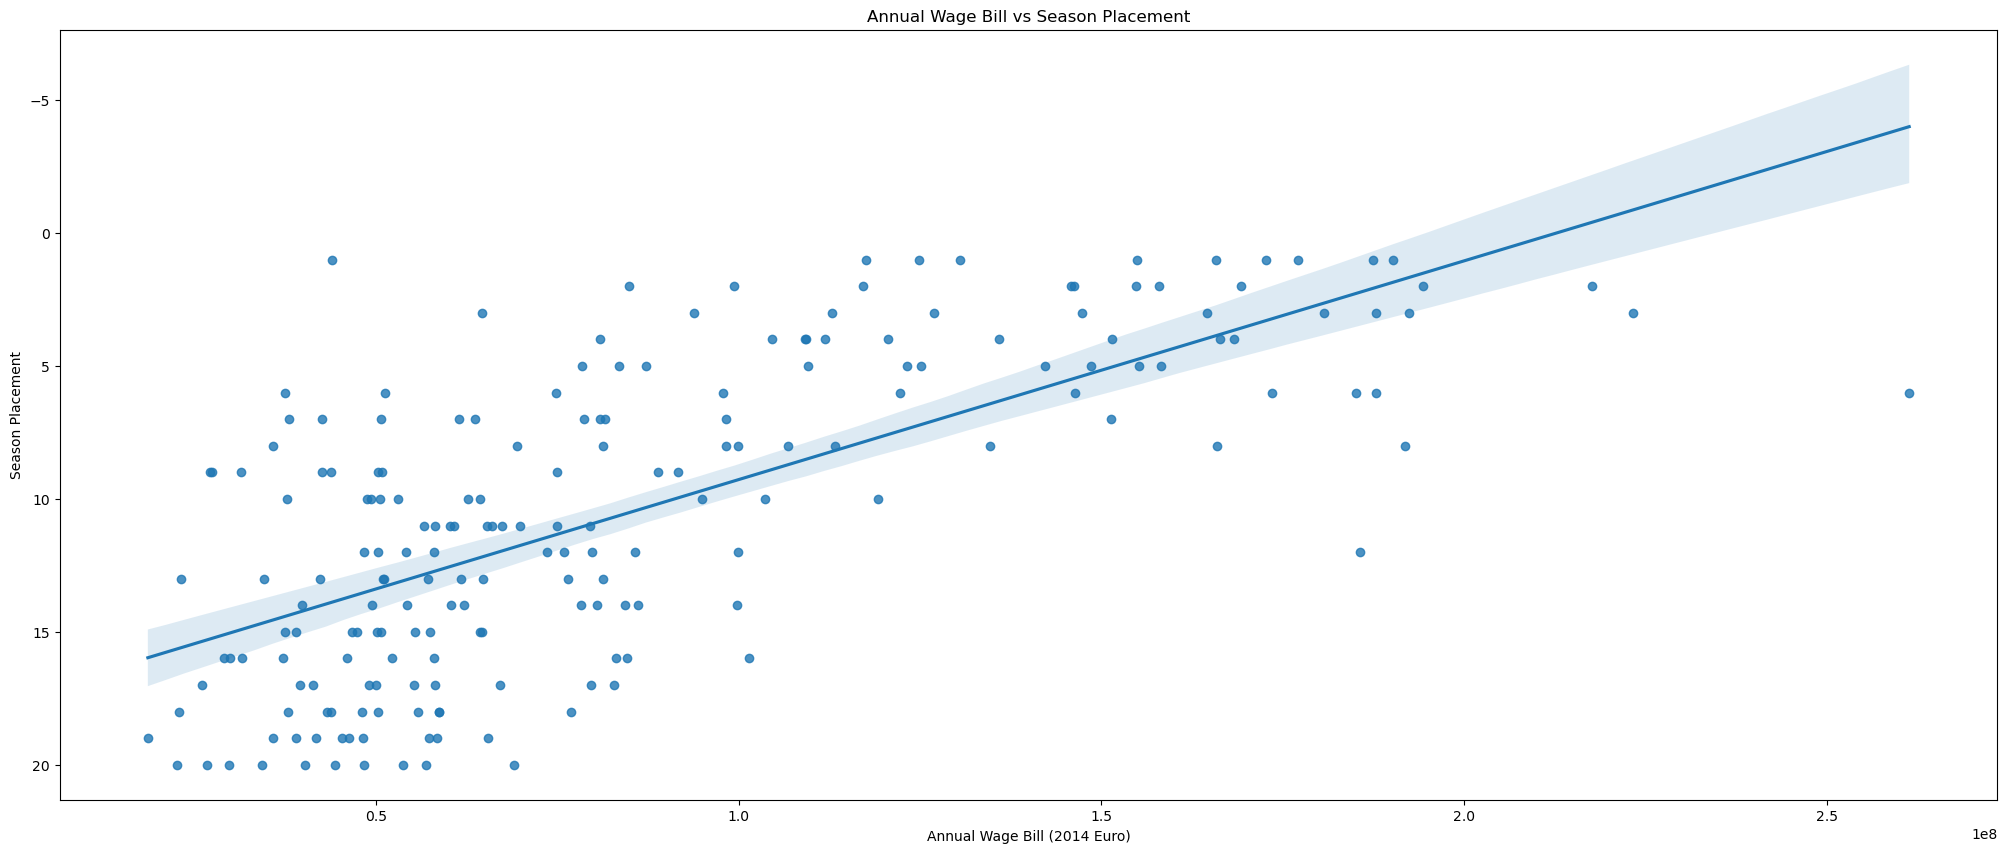

In [38]:
# Plot annual wage bill vs season placement

plt.figure(figsize = (25, 10))

scatter_plot = sns.regplot(data = pl_table_df, x = 'Wage Bill', y = 'Place')

scatter_plot.invert_yaxis()

plt.title('Annual Wage Bill vs Season Placement')
plt.ylabel('Season Placement')
plt.xlabel('Annual Wage Bill (2014 Euro)')

plt.show()


As shown by the Scatter Plot above, Season Placement appears to be positively correlated to Annual Wage Bill.

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

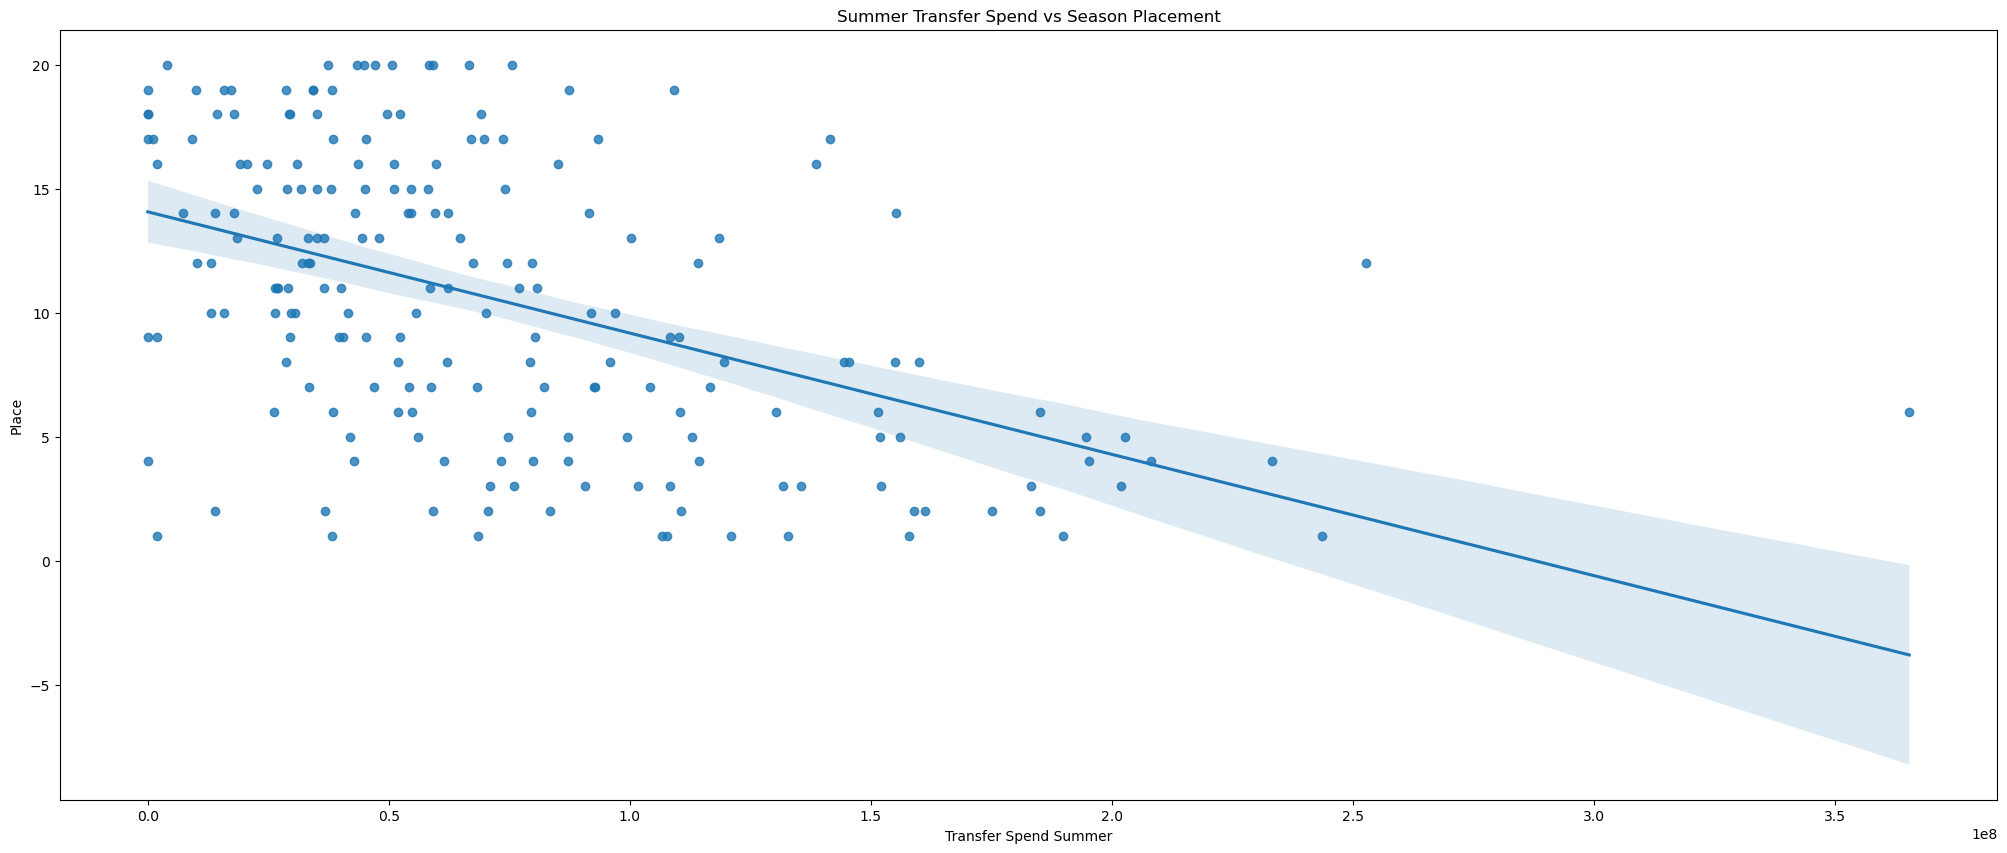

In [17]:
#Plot summer transfer spend vs season placement
plt.figure(figsize = (25, 10))

sns.regplot(data = pl_table_df, x = 'Transfer Spend Summer', y = 'Place')
plt.title('Summer Transfer Spend vs Season Placement')
plt.ylabel

In [18]:
# Create improvement metric from previous season for points

pl_table_df['Points Improvement'] = 0.0

for season in pl_table_df['Season'].unique():
    temp_df = pl_table_df[pl_table_df['Season'] == season]
    prev_season = (str(int(season.split('/')[0]) - 1) + '/' + str(int(season.split('/')[1]) - 1))

    if season == '2014/2015':
        pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Points Improvement"] = None
    else:
        for team in temp_df['Team Name']:
            if pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == prev_season), "Points"].empty == False:
                pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Points Improvement"] = pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Points"].item() - pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == prev_season), "Points"].item()
            else:
                pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Points Improvement"] = None
        
pl_table_df[pl_table_df['Season'] != "2014/2015"].head(10)
pl_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             200 non-null    int64  
 1   Team Name              200 non-null    object 
 2   Season                 200 non-null    object 
 3   W                      200 non-null    int64  
 4   L                      200 non-null    int64  
 5   D                      200 non-null    int64  
 6   GF                     200 non-null    int64  
 7   GF_H                   200 non-null    int64  
 8   GF_A                   200 non-null    int64  
 9   GA                     200 non-null    int64  
 10  GA_H                   200 non-null    int64  
 11  GA_A                   200 non-null    int64  
 12  GD                     200 non-null    int64  
 13  Points                 200 non-null    int64  
 14  Place                  200 non-null    int64  
 15  Transf

In [19]:
# Create improvement metric from previous season for placement

pl_table_df['Place Improvement'] = 0

for season in pl_table_df['Season'].unique():
    temp_df = pl_table_df[pl_table_df['Season'] == season]
    prev_season = (str(int(season.split('/')[0]) - 1) + '/' + str(int(season.split('/')[1]) - 1))

    if season == '2014/2015':
        pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Place Improvement"] = None
    else:
        for team in temp_df['Team Name']:
            if pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == prev_season), "Place"].empty == False:
                pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Place Improvement"] = (pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Place"].item() - pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == prev_season), "Place"].item())
            else:
                pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Place Improvement"] = None


pl_table_df[pl_table_df['Season'] != "2014/2015"].head(10)

,Unnamed: 0,Team Name,Season,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place,Transfer Spend Summer,Transfer Spend Winter,Wage Bill,Points Improvement,Place Improvement
20,11,Leicester City FC,2015/2016,23,3,12,68,35,33,36,18,18,32,81,1,38200000.0,11700000.0,43979401.0,40.0,-13.0
21,61,Arsenal FC,2015/2016,20,7,11,65,31,34,36,11,25,29,71,2,14000000.0,12500000.0,117097928.0,-4.0,-1.0
22,161,Tottenham Hotspur FC,2015/2016,19,6,13,69,35,34,35,15,20,34,70,3,71000000.0,0.0,64694251.0,6.0,-2.0
23,191,Manchester City FC,2015/2016,19,10,9,71,47,24,41,21,20,30,66,4,208150000.0,320000.0,151403244.0,-13.0,2.0
24,1,Manchester United FC,2015/2016,19,10,9,49,27,22,35,9,26,14,66,5,156000000.0,0.0,148561362.0,-4.0,1.0
25,141,Southampton FC,2015/2016,18,11,9,59,39,20,41,22,19,18,63,6,54900000.0,5200000.0,51260009.0,3.0,-1.0
26,21,West Ham United FC,2015/2016,16,8,14,65,34,31,51,26,25,14,62,7,46900000.0,5800000.0,63603053.0,15.0,-5.0
27,71,Liverpool FC,2015/2016,16,10,12,63,33,30,50,22,28,13,60,8,119500000.0,7000000.0,113242366.0,-2.0,2.0
28,41,Stoke City FC,2015/2016,14,15,9,41,22,19,55,24,31,-14,51,9,29400000.0,24250000.0,50276143.0,-3.0,0.0
29,111,Chelsea FC,2015/2016,12,12,14,59,32,27,53,30,23,6,50,10,91900000.0,4600000.0,119183724.0,-37.0,9.0


In [20]:
# Create wage bill increase metric - current year wage bill minus previous year wage bill

pl_table_df['Wage Bill Increase'] = 0

for season in pl_table_df['Season'].unique():
    temp_df = pl_table_df[pl_table_df['Season'] == season]
    prev_season = (str(int(season.split('/')[0]) - 1) + '/' + str(int(season.split('/')[1]) - 1))

    if season == '2014/2015':
        pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Wage Bill Increase"] = None
    else:
        for team in temp_df['Team Name']:
            if pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == prev_season), "Wage Bill"].empty == False:
                pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Wage Bill Increase"] = (pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Wage Bill"].item() - pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == prev_season), "Wage Bill"].item())
            else:
                pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Wage Bill Increase"] = None


pl_table_df[pl_table_df['Season'] != "2014/2015"].head(10)

,Unnamed: 0,Team Name,Season,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place,Transfer Spend Summer,Transfer Spend Winter,Wage Bill,Points Improvement,Place Improvement,Wage Bill Increase
20,11,Leicester City FC,2015/2016,23,3,12,68,35,33,36,18,18,32,81,1,38200000.0,11700000.0,43979401.0,40.0,-13.0,4126275.0
21,61,Arsenal FC,2015/2016,20,7,11,65,31,34,36,11,25,29,71,2,14000000.0,12500000.0,117097928.0,-4.0,-1.0,4189482.0
22,161,Tottenham Hotspur FC,2015/2016,19,6,13,69,35,34,35,15,20,34,70,3,71000000.0,0.0,64694251.0,6.0,-2.0,-13764579.0
23,191,Manchester City FC,2015/2016,19,10,9,71,47,24,41,21,20,30,66,4,208150000.0,320000.0,151403244.0,-13.0,2.0,5557354.0
24,1,Manchester United FC,2015/2016,19,10,9,49,27,22,35,9,26,14,66,5,156000000.0,0.0,148561362.0,-4.0,1.0,-19733371.0
25,141,Southampton FC,2015/2016,18,11,9,59,39,20,41,22,19,18,63,6,54900000.0,5200000.0,51260009.0,3.0,-1.0,508033.0
26,21,West Ham United FC,2015/2016,16,8,14,65,34,31,51,26,25,14,62,7,46900000.0,5800000.0,63603053.0,15.0,-5.0,9391448.0
27,71,Liverpool FC,2015/2016,16,10,12,63,33,30,50,22,28,13,60,8,119500000.0,7000000.0,113242366.0,-2.0,2.0,15416285.0
28,41,Stoke City FC,2015/2016,14,15,9,41,22,19,55,24,31,-14,51,9,29400000.0,24250000.0,50276143.0,-3.0,0.0,6493516.0
29,111,Chelsea FC,2015/2016,12,12,14,59,32,27,53,30,23,6,50,10,91900000.0,4600000.0,119183724.0,-37.0,9.0,-5611017.0


Text(0.5, 1.0, 'Points Improvement vs Transfer Spend Summer')

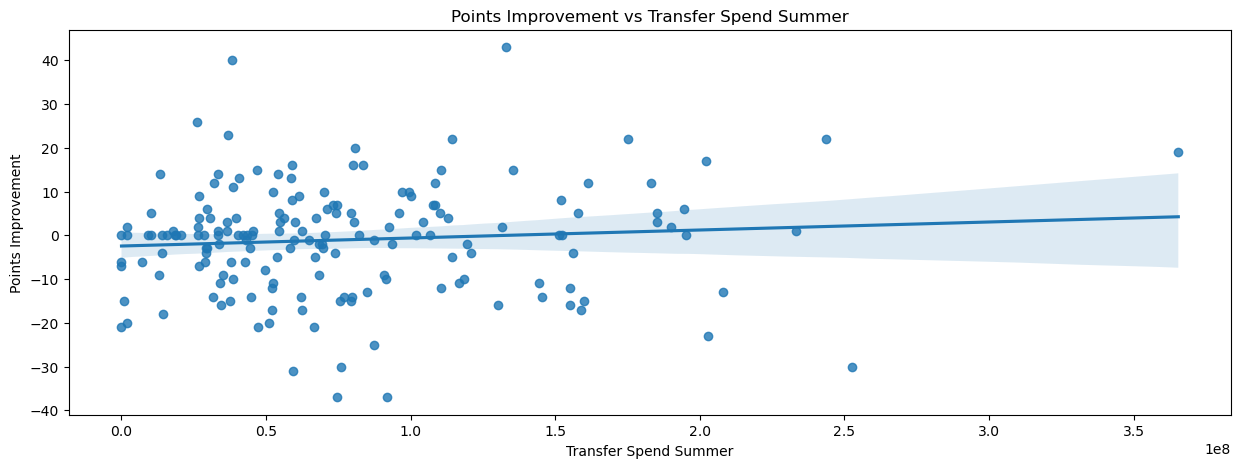

In [21]:
# Points Improvement vs Transfer Spend Summer

plt.figure(figsize = (15,5))

sns.regplot(data = pl_table_df, x = 'Transfer Spend Summer', y = 'Points Improvement')
plt.title('Points Improvement vs Transfer Spend Summer')

Text(0.5, 1.0, 'Place Improvement vs Transfer Spend Summer')

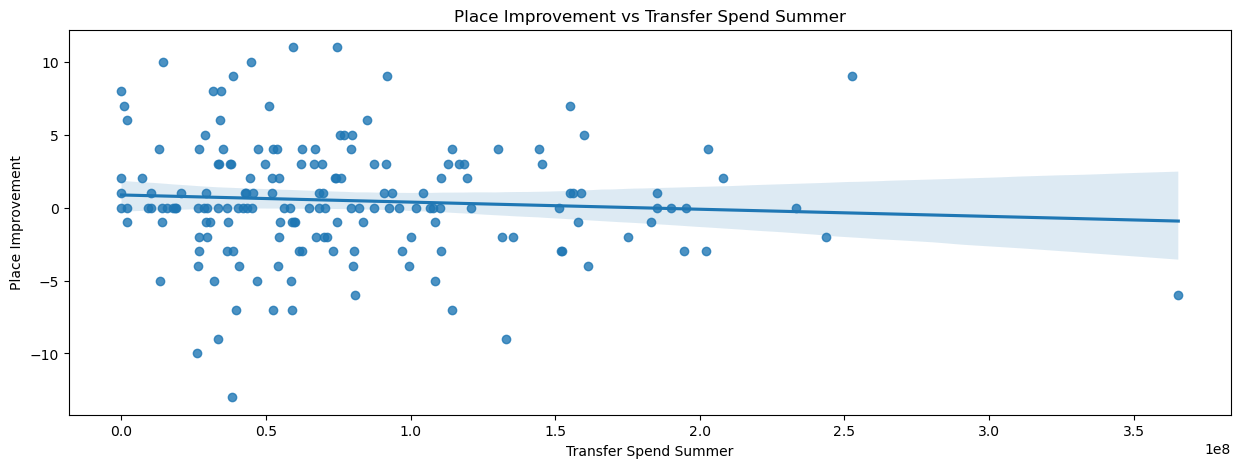

In [22]:
# Place Improvement vs Transfer Spend Summer

plt.figure(figsize = (15,5))

sns.regplot(data = pl_table_df, x = 'Transfer Spend Summer', y = 'Place Improvement')
plt.title('Place Improvement vs Transfer Spend Summer')

Text(0.5, 1.0, 'Place Improvement vs Wage Bill Increase')

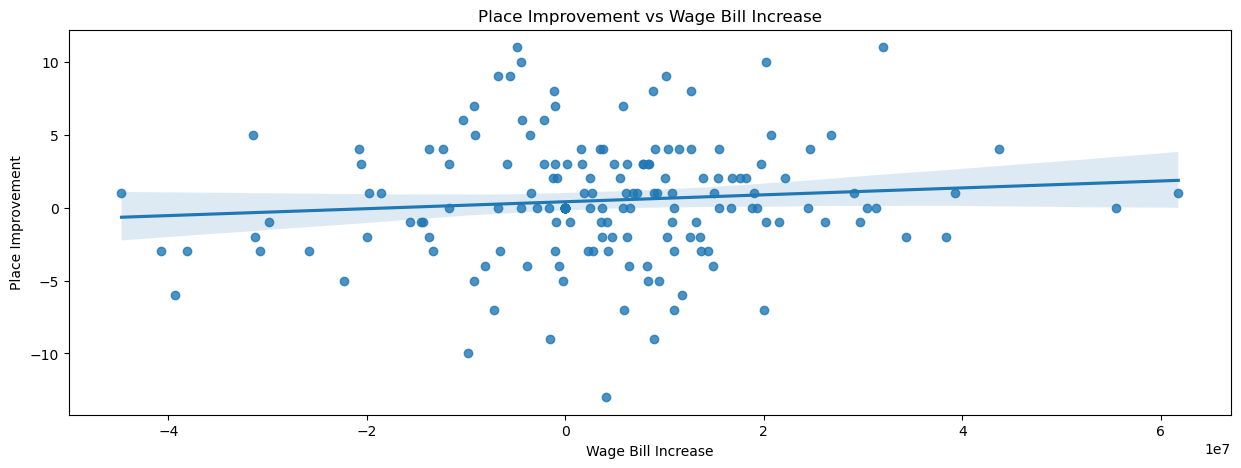

In [23]:
# Place Improvement vs Wage Bill Increase

plt.figure(figsize = (15,5))

sns.regplot(data = pl_table_df, x = 'Wage Bill Increase', y = 'Place Improvement')
plt.title('Place Improvement vs Wage Bill Increase')

Text(0.5, 1.0, 'Points Improvement from Previous Season vs Wage Bill Increase')

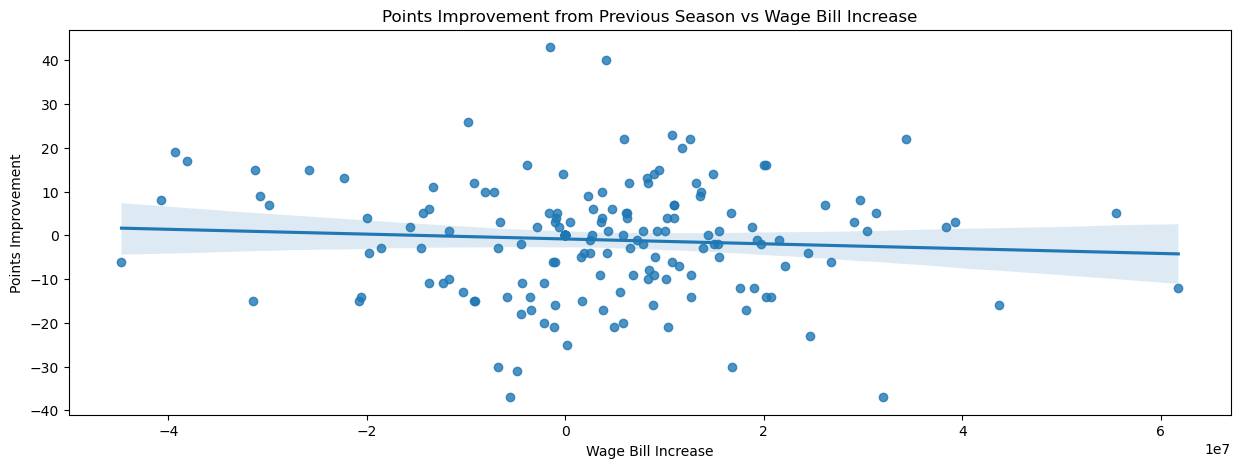

In [24]:

# Points Improvement from previous season vs Wage Bill Increase
plt.figure(figsize = (15,5))

sns.regplot(data = pl_table_df, x = 'Wage Bill Increase', y = 'Points Improvement')
plt.title("Points Improvement from Previous Season vs Wage Bill Increase")

In [25]:
# Create dataset with location data (lat, lon) for team's stadium and previously created features

loc_df = pd.read_csv('../csvs/pl_stadiums_loc.csv')

for team in pl_table_df['Team Name'].unique():
    for season in pl_table_df[pl_table_df['Team Name'] == team]['Season']:
        pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Lat"] = loc_df.loc[loc_df['Team'] == team, "Latitude"].item()
        pl_table_df.loc[(pl_table_df['Team Name'] == team) & (pl_table_df['Season'] == season), "Lon"] = loc_df.loc[loc_df['Team'] == team, "Longitude"].item()

In [26]:
pl_table_df.head()

,Unnamed: 0,Team Name,Season,W,L,D,GF,GF_H,GF_A,GA,GA_H,GA_A,GD,Points,Place,Transfer Spend Summer,Transfer Spend Winter,Wage Bill,Points Improvement,Place Improvement,Wage Bill Increase,Lat,Lon
0,110,Chelsea FC,2014/2015,26,3,9,73,36,37,32,9,23,41,87,1,106700000.0,31000000.0,124794741.0,0.0,0.0,0.0,51.481667,-0.191111
1,190,Manchester City FC,2014/2015,24,7,7,83,44,39,38,14,24,45,79,2,70500000.0,32300000.0,145845890.0,0.0,0.0,0.0,53.482989,-2.200292
2,60,Arsenal FC,2014/2015,22,7,9,71,41,30,36,14,22,35,75,3,101730000.0,17250000.0,112908446.0,0.0,0.0,0.0,51.555000,-0.108611
3,0,Manchester United FC,2014/2015,20,8,10,62,41,21,37,15,22,25,70,4,195350000.0,0.0,168294733.0,0.0,0.0,0.0,53.463056,-2.291389
4,160,Tottenham Hotspur FC,2014/2015,19,12,7,58,31,27,53,24,29,5,64,5,41850000.0,6630000.0,78458830.0,0.0,0.0,0.0,51.603333,-0.065833


In [36]:
# Linear Regressions on placement/points vs wage bill

x = pl_table_df['Wage Bill'].to_numpy().reshape(pl_table_df['Wage Bill'].count(), 1)
y = pl_table_df['Place'].to_numpy().reshape(pl_table_df['Place'].count(), 1)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

r_squared = r2_score(y, y_pred)
print(f"R-squared for Place dependency on Wage Bill: {r_squared}")

x_points = pl_table_df['Wage Bill'].to_numpy().reshape(pl_table_df['Wage Bill'].count(), 1)
y_points = pl_table_df['Points'].to_numpy().reshape(pl_table_df['Points'].count(), 1)

# Create and train Linear Regression model
model_points = LinearRegression()
model_points.fit(x_points, y_points)

y_pred_points = model_points.predict(x_points)

r_squared_points = r2_score(y_points, y_pred_points)
print(f"R-squared for Points dependency on Wage Bill: {r_squared_points}")





R-squared for Place dependency on Wage Bill: 0.48537124887964056
R-squared for Points dependency on Wage Bill: 0.49804764409030156


Based on the R-Squared values calculated from the Linear Regression models above, there are slightly weak correlations for Place dependency on Wage Bill (.49) and for Points dependency on Wage Bill (.50). The data seems to suggest that Wage Bill correlates positively to placement and points in a given season.

In [37]:
# Linear Regressions on placement/points vs transfer spend

x = pl_table_df['Transfer Spend Summer'].to_numpy().reshape(pl_table_df['Transfer Spend Summer'].count(), 1)
y = pl_table_df['Place'].to_numpy().reshape(pl_table_df['Place'].count(), 1)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

r_squared = r2_score(y, y_pred)
print(f"R-squared for Place dependency on Wage Bill: {r_squared}")

x_points = pl_table_df['Transfer Spend Summer'].to_numpy().reshape(pl_table_df['Transfer Spend Summer'].count(), 1)
y_points = pl_table_df['Points'].to_numpy().reshape(pl_table_df['Points'].count(), 1)

# Create and train Linear Regression model
model_points = LinearRegression()
model_points.fit(x_points, y_points)

y_pred_points = model_points.predict(x_points)

r_squared_points = r2_score(y_points, y_pred_points)
print(f"R-squared for Points dependency on Wage Bill: {r_squared_points}")


R-squared for Place dependency on Wage Bill: 0.23490530104386376
R-squared for Points dependency on Wage Bill: 0.2260796434781671


Based on the R-Squared values calculated from the Linear Regression models above, there are very weak positive correlations for Place dependency on Transfer Spend (.23) and for Points dependency on Transfer Spend (.23). The data seems to suggest a weak positive correlation between points/placement and transfer spend.

# Conclusion
Based on the above analyses, we can surmise that greater spend in the Summer transfer window has a very weak positive correlation to subsequent season success; however, annual Wage Bill has a positive correlation double that of the Transfer Spend correlation. These findings seem to suggest that how much players are being paid contributes much more to seasonal success than how much players are purchased for.

Limitations: There were a few limitations to this analysis, namely the source of Transfer Spend data. Transfer Spend data was scraped from a website that collects data from a variety of sources, including fans, so some data may not have been wholly accurate.

Further Research: With the datasets created through this analysis, further research could be done to determine the immediate effects of transfer spend in the summer on the first half of the subsequent season and of transfer spend in the winter on the second half of said season. Additional interesting research could involve determining whether spend on specific positions positively affected pertinent stats in subsequent seasons (e.g. does more spend on offensive players increase goal output in the subsequent season?).

In [27]:
# Create finalized pl_dataset_2014_2024 CSV for use in Tableau visualizations

pl_table_df.drop('Unnamed: 0', axis = 1, inplace = True)
pl_table_df.to_csv('../csvs/completed_pl_dataset_2014_2024.csv')